In [1]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

import numpy as np


# calculate accuracy measures and confusion matrix
from sklearn import metrics

In [3]:
loan_df = pd.read_csv("Bank_Personal_Loan_Modelling.csv")

In [4]:
loan_df.head(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [96]:
#to check whether each column doesnot have non numeric character
loan_df[~loan_df.applymap(np.isreal).all(1)]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


In [97]:
#There are six categorical values CreditCard,Online,CDAccount,SecuritiesAccount,Education, Family
loan_df = pd.get_dummies(loan_df, columns=['CreditCard','Online','CD Account','Securities Account','Education','Family'])

In [98]:
#Lets analysze the distribution of the various attributes
loan_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0
CreditCard_0,5000.0,0.706000,0.455637,0.0,0.00,1.0,1.00,1.0
CreditCard_1,5000.0,0.294000,0.455637,0.0,0.00,0.0,1.00,1.0


In [99]:
# The analysis from the description are as follows:
# We can remove customer IDs as it will not affect the training the model
# Zip code with value 9307 seems to be erroneous value as other pin codes are all 5 digit number
# Age and experience is normally distributed as mean and median are same
# Min value of experience is negative. The experience should not be negative. Check with the data provider
# Mortgage and income data are right skewed. There is a possibility of outlier

In [100]:
loan_df.groupby(["Personal Loan"]).count()

,ID,Age,Experience,Income,ZIP Code,CCAvg,Mortgage,CreditCard_0,CreditCard_1,Online_0,...,CD Account_1,Securities Account_0,Securities Account_1,Education_1,Education_2,Education_3,Family_1,Family_2,Family_3,Family_4
Personal Loan,,,,,,,,,,,,,,,,,,,,,
0,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,...,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520
1,480,480,480,480,480,480,480,480,480,480,...,480,480,480,480,480,480,480,480,480,480


In [102]:
#The data is highly imbalanced as value for group 0 and 1 differ significantly. The ratio is amlost 9 :1 .
#It means that model will predict more correct values for class 0 then class 1

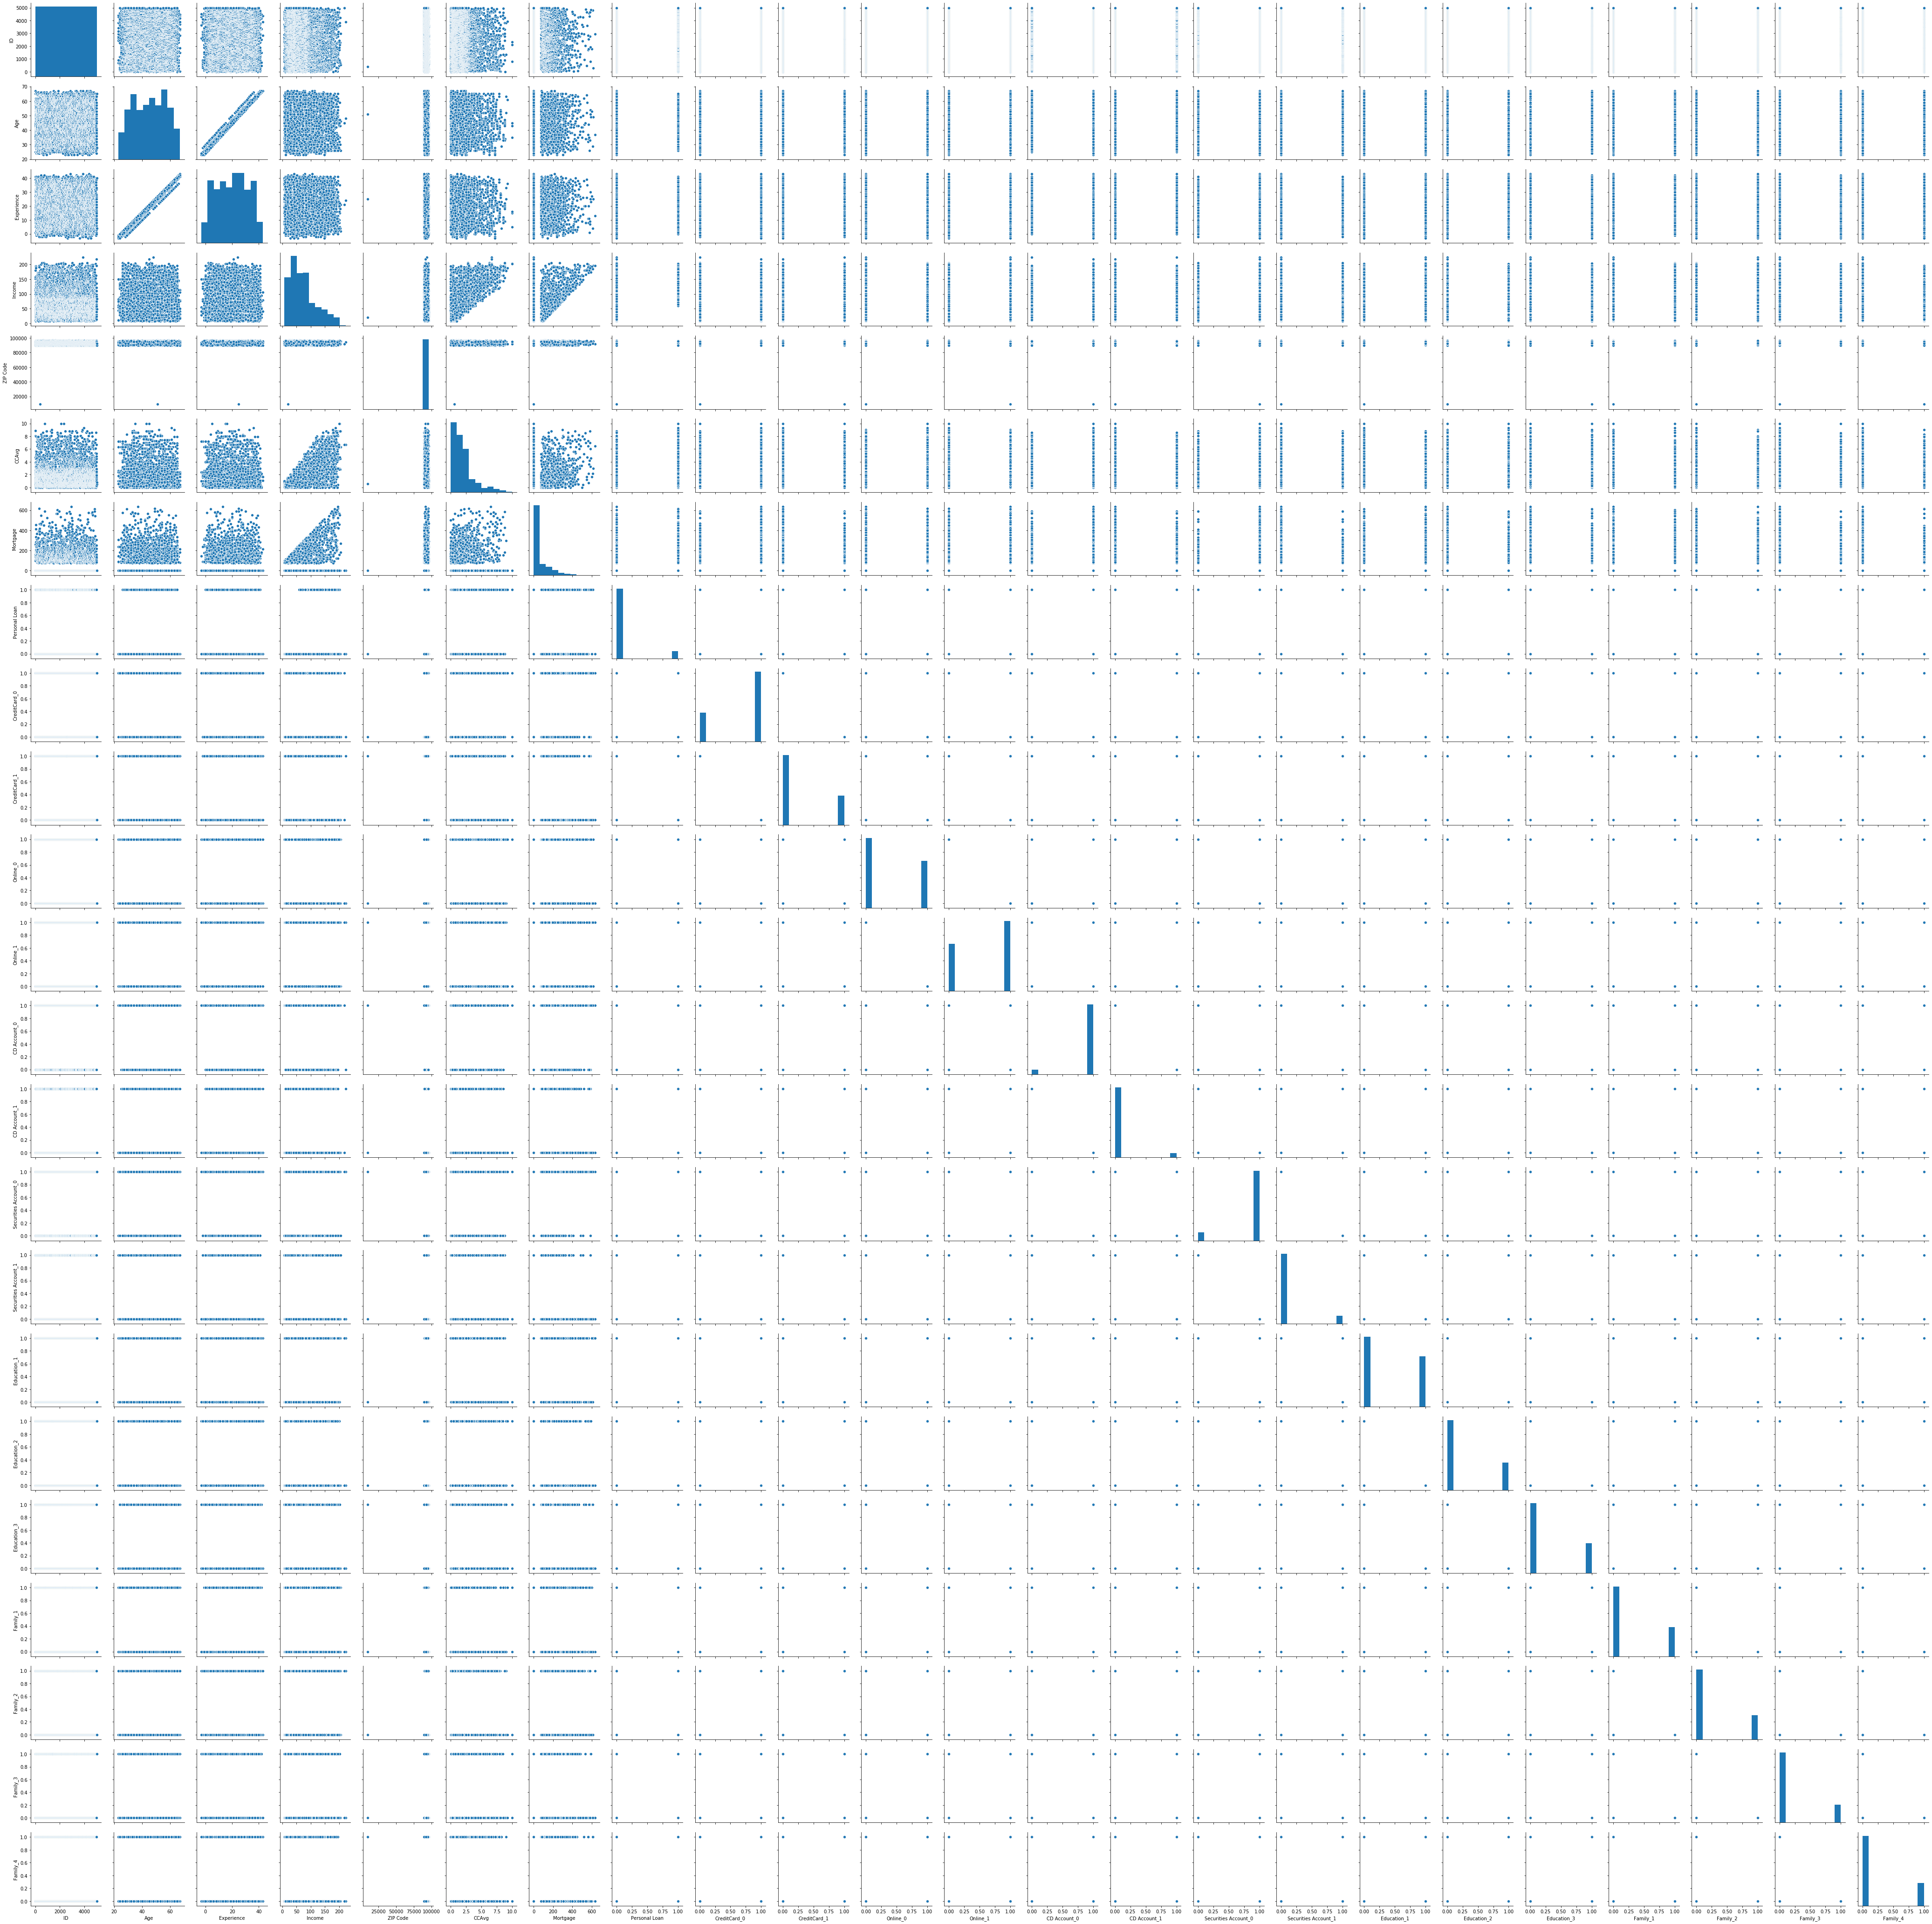

In [118]:
sns.pairplot(loan_df)

In [104]:
# The analysis from pair plot is as follows:
# The age and experience are normally distributed
# Income, CCavg, Mortgage are right skewed
# Mortgage ,CCavg has exponential distribution
# There is no relation between personal loan and age ,family  education ,mortgage,securities amount, CD account
#online, credit card
#

In [105]:
X, y = loan_df.drop(columns = ['Personal Loan','ID']), loan_df.loc[:,'Personal Loan'] 


In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [107]:
# Fit the model on 30%
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)



coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1         2         3         4         5         6  \
0 -0.000551 -0.002455  0.035907 -0.000065  0.011742  0.000845 -0.000047   

          7         8         9  ...        12        13        14        15  \
0 -0.000087  0.000095 -0.000229  ... -0.000812  0.000678 -0.014096  0.006878   

         16        17        18        19        20  intercept  
0  0.007084 -0.005063 -0.005153  0.005655  0.004427  -0.000134  

[1 rows x 22 columns]


C:\Users\vinemade\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [108]:
model_score = model.score(X_test, y_test)
print(model_score)
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(y_test, y_predict))

0.9073333333333333
              precision    recall  f1-score   support

           0       0.95      0.92      0.93      1351
           1       0.44      0.57      0.49       149

    accuracy                           0.88      1500
   macro avg       0.69      0.74      0.71      1500
weighted avg       0.90      0.88      0.89      1500

[[1318   33]
 [ 106   43]]


In [109]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
print(model)
# make predictions
expected = y_test
predicted = model.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

GaussianNB(priors=None, var_smoothing=1e-09)
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1351
           1       0.45      0.51      0.48       149

    accuracy                           0.89      1500
   macro avg       0.70      0.72      0.71      1500
weighted avg       0.90      0.89      0.89      1500

[[1259   92]
 [  73   76]]


In [110]:
from scipy.stats import zscore


In [116]:
#Normalizing the data for z score
X, y = loan_df.drop(columns = ['Personal Loan','ID']), loan_df.loc[:,'Personal Loan'] 
X_z = X.apply(zscore)
X_train, X_test, y_train, y_test = train_test_split(X_z, y, test_size = 0.3, random_state = 1)

In [112]:
from sklearn.neighbors import KNeighborsClassifier
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )

In [113]:
NNH.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [114]:
predicted_labels = NNH.predict(X_test)
NNH.score(X_test, y_test)

0.9413333333333334

In [115]:
from sklearn import metrics
print(metrics.classification_report(y_test, predicted_labels))
print(metrics.confusion_matrix(y_test, predicted_labels))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1351
           1       0.94      0.44      0.60       149

    accuracy                           0.94      1500
   macro avg       0.94      0.72      0.78      1500
weighted avg       0.94      0.94      0.93      1500

[[1347    4]
 [  84   65]]


In [ ]:
#Observations on Model
# Precision and Recall for class 0 is better for all the models as the number of samples are more in Class0
# For KNN the precision for class 1 is better than any other algorithm , but recall for logistic 
# regression is better than KNN
#Naive Bayes assumes that the variables are linearly independent,but varibles age and experience are
# related
# Since there are more categorical variables KNN has performed better
# Some independent varibles are not linearly related to the dependent variables so Logistic regression
# has not performed well.